<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/RetailAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import dates as mpl_dates
from matplotlib import pyplot as plt
from itertools import combinations
from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/OnlineRetail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print(len(df))
df.info()

541909
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Preprocessing
def preprocess(df):
  df = df[df['UnitPrice'] != 0]
  df['UnitPrice'] = df['UnitPrice'].abs()
  df['Quantity']  = df['Quantity'].abs()
  return df

df_preprocessed = preprocess(df)
len(df_preprocessed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


539394

In [ ]:
print(df_preprocessed['Quantity'].min())
print(df_preprocessed['Quantity'].max())

1
80995


In [ ]:
def price_calc(df):
  #price for each item
  df['Price'] = df['Quantity'] * df['UnitPrice']
  #product variety count for each invoice
  df['NumProducts'] = df.groupby(['InvoiceNo'])['Price'].transform('count')
  #Total bill for an invoice
  k = df.groupby('InvoiceNo')['Price'].sum()
  df = pd.merge(df, k, on="InvoiceNo")
  return df

df_new = price_calc(df_preprocessed)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_new = df_new.rename(columns={'StockCode':'ProductID','Price_x':'ProductPrice','Price_y':'TotalBill'})
df_new['Weekday'] = df_new['InvoiceDate'].dt.day_name()
df_new.to_csv('df_new.csv')
df_new.head()

,InvoiceNo,ProductID,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ProductPrice,NumProducts,TotalBill,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,7,139.12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,7,139.12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,7,139.12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,7,139.12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,7,139.12,Wednesday


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539394 entries, 0 to 539393
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     539394 non-null  object        
 1   ProductID     539394 non-null  object        
 2   Description   539394 non-null  object        
 3   Quantity      539394 non-null  int64         
 4   InvoiceDate   539394 non-null  datetime64[ns]
 5   UnitPrice     539394 non-null  float64       
 6   CustomerID    406789 non-null  float64       
 7   Country       539394 non-null  object        
 8   ProductPrice  539394 non-null  float64       
 9   NumProducts   539394 non-null  int64         
 10  TotalBill     539394 non-null  float64       
 11  Weekday       539394 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 53.5+ MB


In [ ]:
#Revenue dataframe
df_rev = df_new.groupby(['InvoiceDate','InvoiceNo', 'Weekday','Country','TotalBill']).size().reset_index(name='ProductCount')
ts = pd.to_datetime('12-01-2011')
df_rev = df_rev.loc[df_rev.InvoiceDate <= ts, :]
df_rev

,InvoiceDate,InvoiceNo,Weekday,Country,TotalBill,ProductCount
0,2010-12-01 08:26:00,536365,Wednesday,United Kingdom,139.12,7
1,2010-12-01 08:28:00,536366,Wednesday,United Kingdom,22.20,2
2,2010-12-01 08:34:00,536367,Wednesday,United Kingdom,278.73,12
3,2010-12-01 08:34:00,536368,Wednesday,United Kingdom,70.05,4
4,2010-12-01 08:35:00,536369,Wednesday,United Kingdom,17.85,1
...,...,...,...,...,...,...
22871,2011-11-30 17:32:00,C579883,Wednesday,United Kingdom,19.15,2
22872,2011-11-30 17:34:00,C579884,Wednesday,United Kingdom,20.53,1
22873,2011-11-30 17:37:00,579885,Wednesday,United Kingdom,1075.36,147
22874,2011-11-30 17:39:00,C579886,Wednesday,United Kingdom,91.27,12


In [ ]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22876 entries, 0 to 22875
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   InvoiceDate   22876 non-null  datetime64[ns]
 1   InvoiceNo     22876 non-null  object        
 2   Weekday       22876 non-null  object        
 3   Country       22876 non-null  object        
 4   TotalBill     22876 non-null  float64       
 5   ProductCount  22876 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
print(df_rev.InvoiceDate.max())
print(df_rev.InvoiceDate.min())
df_rev.InvoiceDate.max() - df_rev.InvoiceDate.min()

2011-11-30 17:42:00
2010-12-01 08:26:00


Timedelta('364 days 09:16:00')

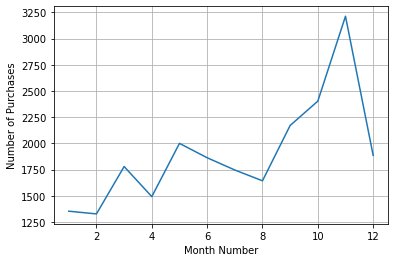

In [ ]:
df_rev['Month'] = df_rev.InvoiceDate.dt.month
df_rev.Month.value_counts().sort_index().plot()
plt.ylabel('Number of Purchases')
plt.xlabel('Month Number')
plt.grid()
plt.show()

1. BEST MONTH FOR SALES

         TotalBill  ProductCount
Month                           
11     1561224.550         84445
10     1240039.000         60504
9      1101337.562         50066
12      898733.580         42208
8       836452.170         35153
6       832579.750         36688
1       828301.160         35007
5       820884.360         36785
3       783076.340         36502
7       758769.751         39330
4       585250.941         29655
2       557878.600         27580


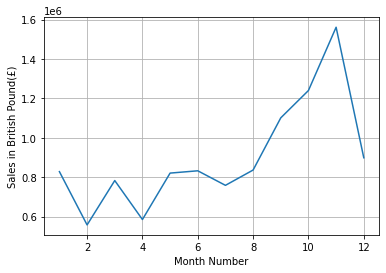

In [ ]:
monthly_sales = df_rev.groupby('Month').sum()
months = range(1,13)
print(monthly_sales.sort_values(['TotalBill'], ascending = False))
plt.plot(months, monthly_sales['TotalBill'])
plt.ylabel('Sales in British Pound(£)')
plt.xlabel('Month Number')
plt.grid()
plt.show()

2. BEST WEEKDAY FOR SALES

In [ ]:
#weekly_sales = df_rev.groupby('Weekday').sum()
#week = df_rev['Weekday'].unique()
#print(weekly_sales.sort_values(['TotalBill'], ascending = False))
#plt.bar(week, weekly_sales['TotalBill'])
#plt.ylabel('Sales in BP (£)')
#plt.xlabel('Weekday')
#plt.show()
df_rev.groupby('Weekday').sum().sort_values(['TotalBill'], ascending = False)

,TotalBill,ProductCount,Month
Weekday,,,
Tuesday,2359744.931,97846,29140
Thursday,2160781.050,95528,35421
Wednesday,1900298.330,91625,30857
Monday,1857711.621,89433,26413
Friday,1722574.621,77157,24554
Sunday,803417.211,62334,17015


3. BEST COUNTRY FOR SALES

                        TotalBill  ProductCount   Month               Country
Country                                                                      
United Kingdom        9126206.544        469109  146834        United Kingdom
EIRE                   297456.580          7857    2640                  EIRE
Netherlands            274503.120          2281     686           Netherlands
Germany                227872.430          9153    4222               Germany
France                 216037.990          8217    3106                France
Australia              139965.350          1256     440             Australia
Spain                   68018.650          2461     707                 Spain
Switzerland             57794.450          2001     522           Switzerland
Belgium                 40055.690          1971     763               Belgium
Sweden                  39684.750           460     318                Sweden
Japan                   39420.760           350     164         

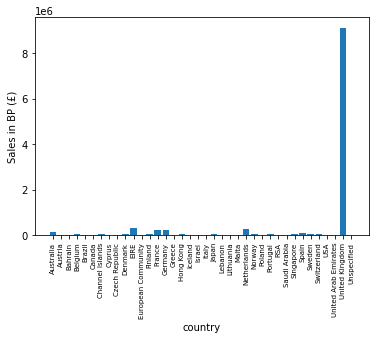

In [ ]:
country_sales = df_rev.groupby('Country').sum()
country_sales['Country'] = country_sales.index
country = country_sales['Country'].unique()
print(country_sales.sort_values(['TotalBill'], ascending = False))
plt.bar(country, country_sales['TotalBill'])
plt.xticks(country, rotation = 'vertical', size = 7)
plt.ylabel('Sales in BP (£)')
plt.xlabel('country')
plt.show()

4. BEST HOUR FOR SALES

        TotalBill  ProductCount  Month
Hour                                  
10    1504426.111         45835  18649
15    1491333.180         75601  19197
12    1458414.610         74853  25391
13    1311833.670         69377  22373
11    1252925.950         54839  19638
14    1229263.581         64440  19817
9      842958.581         32097  11652
16     750222.880         50594  12056
17     452836.821         25675   6665
8      272041.800          8345   4121
18     132517.140          7701   1789
19      52354.890          3295   1452
7       31109.100           383    203
20      21783.600           847    221
6         505.850            41    176


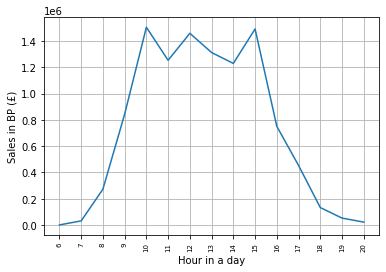

In [ ]:
df_rev['Hour'] = df_rev['InvoiceDate'].dt.hour
hourly_sales = df_rev.groupby('Hour').sum()
hours = [hour for hour, df_rev in df_rev.groupby('Hour')]
print(hourly_sales.sort_values(['TotalBill'], ascending = False))

plt.plot(hours, hourly_sales['TotalBill'])
plt.xticks(hours, rotation = 'vertical', size = 7)
plt.ylabel('Sales in BP (£)')
plt.xlabel('Hour in a day')
plt.grid()
plt.show()



5. ASSOCIATIVE PRODUCT MINING

   Items that can be sold together


In [ ]:
df_dup = df_new.copy()
df_dup = df_dup[df_new['InvoiceNo'].duplicated(keep = False)]
#df_dup.info()

In [ ]:
df_dup['Basket'] = df_dup.groupby('InvoiceNo')['Description'].transform(lambda x: ', '.join(x))
df_dup = df_dup[['InvoiceNo', 'Basket' ]].drop_duplicates()
df_dup

,InvoiceNo,Basket
0,536365,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE META..."
7,536366,"HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT"
9,536367,"ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU..."
21,536368,"JAM MAKING SET WITH JARS, RED COAT RACK PARIS ..."
26,536370,"ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELIK..."
...,...,...
539350,581583,"LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEAR..."
539352,581584,"RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE ..."
539354,581585,"BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTTL..."
539375,581586,"LARGE CAKE STAND HANGING STRAWBERY, SET OF 3 ..."


In [ ]:
count = Counter()
for row in df_dup['Basket']:
  row_list = row.split(', ')
  count.update(Counter(combinations(row_list,2)))

In [ ]:
for items, freq in count.most_common(10):
  print(items, freq)

('KEY FOB ', 'KEY FOB ') 808
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER') 617
('KEY FOB ', 'BACK DOOR ') 588
('KEY FOB ', 'SHED') 553
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT') 544
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER ') 533
('KEY FOB ', 'FRONT  DOOR ') 481
('JUMBO SHOPPER VINTAGE RED PAISLEY', 'JUMBO BAG RED RETROSPOT') 467
('JUMBO BAG RED RETROSPOT', 'DOTCOM POSTAGE') 461
('JUMBO STORAGE BAG SUKI', 'JUMBO BAG RED RETROSPOT') 458


6. PRODUCT and QUANTITY RELATIONSHIP

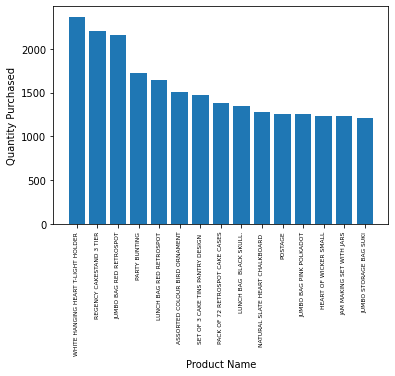

In [ ]:
product_group = df_new.groupby('Description').size().reset_index(name='ProductPurchase')
product_group.sort_values(['ProductPurchase'], ascending = False, inplace = True)
product_group = product_group.iloc[0:15,]
quantity  = product_group['ProductPurchase']
products  = product_group['Description']

plt.bar(products, quantity)
plt.xticks(products, rotation = 'vertical', size = 6 )
plt.xlabel('Product Name')
plt.ylabel('Quantity Purchased')
plt.show()

In [ ]:
product_group

,Description,ProductPurchase
3859,WHITE HANGING HEART T-LIGHT HOLDER,2365
2864,REGENCY CAKESTAND 3 TIER,2198
1825,JUMBO BAG RED RETROSPOT,2156
2422,PARTY BUNTING,1726
2012,LUNCH BAG RED RETROSPOT,1638
228,ASSORTED COLOUR BIRD ORNAMENT,1501
3144,SET OF 3 CAKE TINS PANTRY DESIGN,1473
2346,PACK OF 72 RETROSPOT CAKE CASES,1385
2004,LUNCH BAG BLACK SKULL.,1350
2206,NATURAL SLATE HEART CHALKBOARD,1280


NameError: ignored

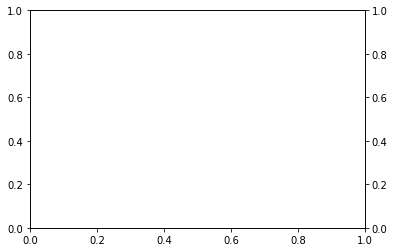

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, 'g-')
ax2.plot(products, ProductBill, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()